In [1]:
# packages to store and manipulate data
import pandas as pd
import numpy as np

# plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

# model building package
import sklearn

# package to clean text
import re

In [3]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('./drive/MyDrive/Colab Notebooks/SentimentAnalysis/climate_tweets.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df.head(10)


,tweet
0,Global warming report urges governments to act...
1,Fighting poverty and global warming in Africa ...
2,Carbon offsets: How a Vatican forest failed to...
3,Carbon offsets: How a Vatican forest failed to...
4,URUGUAY: Tools Needed for Those Most Vulnerabl...
5,RT @sejorg: RT @JaymiHeimbuch: Ocean Saltiness...
6,Global warming evidence all around us|A messag...
7,Migratory Birds' New Climate Change Strategy: ...
8,Southern Africa: Competing for Limpopo Water: ...
9,"Global warming to impact wheat, rice productio..."


In [6]:
# make a new column to highlight retweets
df['is_retweet'] = df['tweet'].apply(lambda x: x[:2]=='RT')


In [7]:
df.head(10)


,tweet,is_retweet
0,Global warming report urges governments to act...,False
1,Fighting poverty and global warming in Africa ...,False
2,Carbon offsets: How a Vatican forest failed to...,False
3,Carbon offsets: How a Vatican forest failed to...,False
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,False
5,RT @sejorg: RT @JaymiHeimbuch: Ocean Saltiness...,True
6,Global warming evidence all around us|A messag...,False
7,Migratory Birds' New Climate Change Strategy: ...,False
8,Southern Africa: Competing for Limpopo Water: ...,False
9,"Global warming to impact wheat, rice productio...",False


In [8]:
df['is_retweet'].sum()  # number of retweets


773

In [9]:
# number of unique retweets
df.loc[df['is_retweet']].tweet.unique().size


677

In [10]:
# 10 most repeated tweets
df.groupby(['tweet']).size().reset_index(name='counts')\
  .sort_values('counts', ascending=False).head(10)
  

,tweet,counts
3131,No matter if you believe in global warming or ...,20
4555,Take Action @change: Help Protect Wildlife Hab...,14
4027,RT @newtgingrich: Historic snow storm in washi...,9
1765,Fight Climate Change From All Fronts: [link],8
1626,Earth's polar ice sheets vulnerable to even mo...,7
1941,Global Warming Dent's El Ni'o's Protective Shi...,7
1799,Foes of California's global warming law pour m...,6
1351,Coalition of the Tired of Waiting: Fighting Cl...,6
4271,SCIENCE: Scientists explore the evolution of c...,6
1040,Carbon offsets: How a Vatican forest failed to...,6


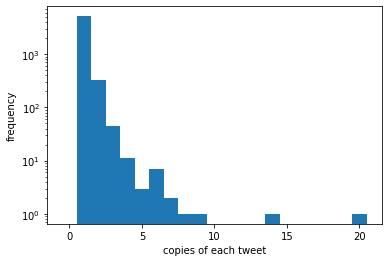

In [11]:
# number of times each tweet appears
counts = df.groupby(['tweet']).size()\
           .reset_index(name='counts')\
           .counts

# define bins for histogram
my_bins = np.arange(0,counts.max()+2, 1)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('copies of each tweet')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()


In [12]:
def find_retweeted(tweet):
    '''This function will extract the twitter handles of retweed people'''
    return re.findall('(?<=RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

def find_mentioned(tweet):
    '''This function will extract the twitter handles of people mentioned in the tweet'''
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)  

def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)
    

In [13]:
# make new columns for retweeted usernames, mentioned usernames and hashtags
df['retweeted'] = df.tweet.apply(find_retweeted)
df['mentioned'] = df.tweet.apply(find_mentioned)
df['hashtags'] = df.tweet.apply(find_hashtags)


In [14]:
df.head(20)

,tweet,is_retweet,retweeted,mentioned,hashtags
0,Global warming report urges governments to act...,False,[],[],[]
1,Fighting poverty and global warming in Africa ...,False,[],[],[]
2,Carbon offsets: How a Vatican forest failed to...,False,[],[],[]
3,Carbon offsets: How a Vatican forest failed to...,False,[],[],[]
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,False,[],[],[]
5,RT @sejorg: RT @JaymiHeimbuch: Ocean Saltiness...,True,"[@sejorg, @JaymiHeimbuch]",[],[]
6,Global warming evidence all around us|A messag...,False,[],[],[]
7,Migratory Birds' New Climate Change Strategy: ...,False,[],[],[]
8,Southern Africa: Competing for Limpopo Water: ...,False,[],[],[]
9,"Global warming to impact wheat, rice productio...",False,[],[],[]


In [15]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = df.loc[
                       df.hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags']]
                       

In [16]:
hashtags_list_df.head(10)


,hashtags
12,"[#Climate, #population]"
16,[#EarthDay]
26,[#ac]
31,[#tcot]
36,"[#tornadocot, #ocra, #sgp, #gop, #ucot, #tlot,..."
37,[#justinbiebersucks]
39,"[#tcot, #p2]"
48,"[#IPCC, #teaparty]"
70,"[#global, #climate, #eco]"
79,"[#EarthWeek, #Indigenous]"


In [17]:
# create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags
    for hashtag in hashtags_list],
    columns=['hashtag'])

In [18]:
flattened_hashtags_df.head(20)


,hashtag
0,#Climate
1,#population
2,#EarthDay
3,#ac
4,#tcot
5,#tornadocot
6,#ocra
7,#sgp
8,#gop
9,#ucot


In [19]:
# number of unique hashtags
flattened_hashtags_df['hashtag'].unique().size


477

In [20]:
# count of appearances of each hashtag
popular_hashtags = flattened_hashtags_df.groupby('hashtag').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)
                                        

In [21]:
popular_hashtags.head(10)


,hashtag,counts
0,#tcot,227
1,#climate,202
2,#p2,112
3,#green,50
4,#climatechange,47
5,#teaparty,41
6,#global,40
7,#eco,40
8,#SaveTerra,36
9,#climategate,33


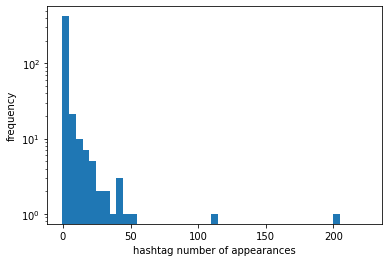

In [22]:
# number of times each hashtag appears
counts = flattened_hashtags_df.groupby(['hashtag']).size()\
                              .reset_index(name='counts')\
                              .counts

# define bins for histogram                              
my_bins = np.arange(0,counts.max()+2, 5)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('hashtag number of appearances')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()

In [23]:
# take hashtags which appear at least this amount of times
min_appearance = 10
# find popular hashtags - make into python set for efficiency
popular_hashtags_set = set(popular_hashtags[
                           popular_hashtags.counts>=min_appearance
                           ]['hashtag'])

In [24]:
# make a new column with only the popular hashtags
hashtags_list_df['popular_hashtags'] = hashtags_list_df.hashtags.apply(
            lambda hashtag_list: [hashtag for hashtag in hashtag_list
                                  if hashtag in popular_hashtags_set])


In [25]:
hashtags_list_df.head(10)


,hashtags,popular_hashtags
12,"[#Climate, #population]",[#Climate]
16,[#EarthDay],[#EarthDay]
26,[#ac],[]
31,[#tcot],[#tcot]
36,"[#tornadocot, #ocra, #sgp, #gop, #ucot, #tlot,...","[#ocra, #sgp, #gop, #tlot, #p2]"
37,[#justinbiebersucks],[]
39,"[#tcot, #p2]","[#tcot, #p2]"
48,"[#IPCC, #teaparty]","[#IPCC, #teaparty]"
70,"[#global, #climate, #eco]","[#global, #climate, #eco]"
79,"[#EarthWeek, #Indigenous]",[]


In [26]:
# drop rows without popular hashtag
popular_hashtags_list_df = hashtags_list_df.loc[
            hashtags_list_df.popular_hashtags.apply(lambda hashtag_list: hashtag_list !=[])]
            

In [27]:
popular_hashtags_list_df.head(10)

,hashtags,popular_hashtags
12,"[#Climate, #population]",[#Climate]
16,[#EarthDay],[#EarthDay]
31,[#tcot],[#tcot]
36,"[#tornadocot, #ocra, #sgp, #gop, #ucot, #tlot,...","[#ocra, #sgp, #gop, #tlot, #p2]"
39,"[#tcot, #p2]","[#tcot, #p2]"
48,"[#IPCC, #teaparty]","[#IPCC, #teaparty]"
70,"[#global, #climate, #eco]","[#global, #climate, #eco]"
137,"[#EPA, #climate]",[#climate]
138,"[#Canadian, #CEOs, #green]",[#green]
140,[#climate],[#climate]


In [28]:
# make new dataframe
hashtag_vector_df = popular_hashtags_list_df.loc[:, ['popular_hashtags']]

for hashtag in popular_hashtags_set:
    # make columns to encode presence of hashtags
    hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
        lambda hashtag_list: int(hashtag in hashtag_list))
    

In [29]:
hashtag_vector_df.head(10)

,popular_hashtags,#FoxNews,#TCOT,#gop,#News,#green,#tlot,#du1,#cochabamba,#environment,...,#Green,#energy,#eco,#snowpocalypse,#tcot,#climate,#global,#sgp,#agw,#news
12,[#Climate],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,[#EarthDay],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,[#tcot],0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
36,"[#ocra, #sgp, #gop, #tlot, #p2]",0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
39,"[#tcot, #p2]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
48,"[#IPCC, #teaparty]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70,"[#global, #climate, #eco]",0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
137,[#climate],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
138,[#green],0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140,[#climate],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [30]:
hashtag_matrix = hashtag_vector_df.drop('popular_hashtags', axis=1)


In [31]:
hashtag_matrix.head(10)


,#FoxNews,#TCOT,#gop,#News,#green,#tlot,#du1,#cochabamba,#environment,#cleantech,...,#Green,#energy,#eco,#snowpocalypse,#tcot,#climate,#global,#sgp,#agw,#news
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
36,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
39,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
48,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
138,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


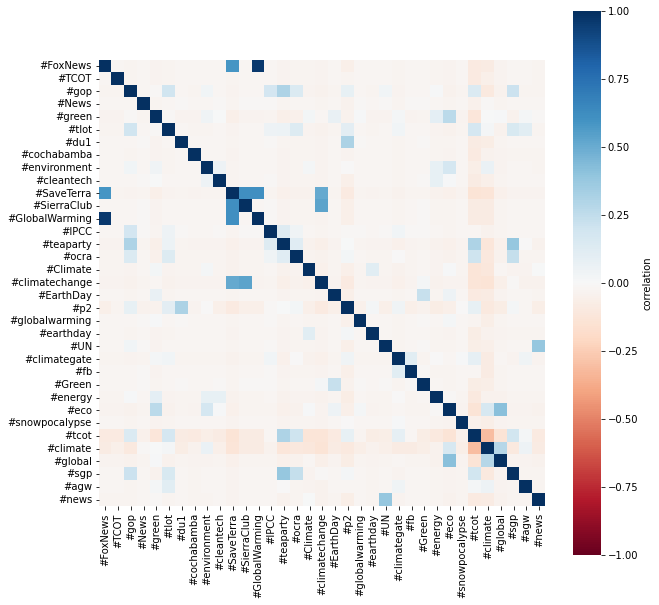

In [32]:
# calculate the correlation matrix
correlations = hashtag_matrix.corr()

# plot the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlations,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    square = True,
    cbar_kws={'label':'correlation'})
plt.show()


In [33]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [34]:
def remove_links(tweet):
    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet
    

In [35]:
my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'

# cleaning master function
def clean_tweet(tweet, bigrams=False):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = tweet.lower() # lower case
    tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
    tweet = re.sub('\s+', ' ', tweet) #remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
    tweet_token_list = [word for word in tweet.split(' ')
                            if word not in my_stopwords] # remove stopwords

    tweet_token_list = [word_rooter(word) if '#' not in word else word
                        for word in tweet_token_list] # apply word rooter
    if bigrams:
        tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
                                            for i in range(len(tweet_token_list)-1)]
    tweet = ' '.join(tweet_token_list)
    return tweet
    

In [36]:
df['clean_tweet'] = df.tweet.apply(clean_tweet)


In [37]:
df.head(10)


,tweet,is_retweet,retweeted,mentioned,hashtags,clean_tweet
0,Global warming report urges governments to act...,False,[],[],[],global warm report urg govern act brussel belg...
1,Fighting poverty and global warming in Africa ...,False,[],[],[],fight poverti global warm africa
2,Carbon offsets: How a Vatican forest failed to...,False,[],[],[],carbon offset vatican forest fail reduc global...
3,Carbon offsets: How a Vatican forest failed to...,False,[],[],[],carbon offset vatican forest fail reduc global...
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,False,[],[],[],uruguay tool need vulner climat chang
5,RT @sejorg: RT @JaymiHeimbuch: Ocean Saltiness...,True,"[@sejorg, @JaymiHeimbuch]",[],[],ocean salti show global warm intensifi water ...
6,Global warming evidence all around us|A messag...,False,[],[],[],global warm evid around us messag global warm ...
7,Migratory Birds' New Climate Change Strategy: ...,False,[],[],[],migratori bird new climat chang strategi stay ...
8,Southern Africa: Competing for Limpopo Water: ...,False,[],[],[],southern africa compet limpopo water climat ch...
9,"Global warming to impact wheat, rice productio...",False,[],[],[],global warm impact wheat rice product india lu...


In [38]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(df['clean_tweet']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names_out()


In [39]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 10

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)


In [40]:
model.fit(tf)

LatentDirichletAllocation(random_state=0)

In [41]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [42]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,climat,1220.2,global,666.5,global,1147.2,global,473.1,climat,422.0,global,783.0,chang,666.1,warm,167.9,climat,568.3,climat,529.9
1,chang,1184.5,warm,658.1,warm,1102.1,warm,450.7,chang,401.8,warm,764.7,climat,661.6,#climate,139.2,chang,550.5,chang,520.6
2,via,257.9,snow,160.5,scientist,150.2,believ,101.3,legisl,123.2,gore,137.1,energi,178.8,volcano,128.9,new,321.1,peopl,153.4
3,scienc,112.9,#tcot,121.6,say,87.1,california,87.1,us,105.1,snow,123.7,u,109.8,global,128.6,bill,116.9,world,151.3
4,news,79.5,like,99.0,scienc,71.7,blame,82.1,via,60.5,al,122.1,via,96.5,chang,122.0,senat,106.1,confer,110.1
5,day,77.8,blizzard,90.9,debat,66.6,law,78.6,say,55.9,great,94.1,nation,89.0,help,114.1,agenc,95.1,bill,106.4
6,earth,68.2,dc,86.5,man,61.1,report,77.8,video,55.9,cold,77.1,make,74.5,take,96.8,immigr,77.7,talk,94.8
7,trial,68.1,think,83.3,made,54.0,save,61.8,place,54.1,call,76.5,impact,67.5,climat,76.7,obama,75.6,graham,92.1
8,clinic,68.1,due,80.1,show,51.9,money,56.1,good,52.6,#tcot,75.3,report,63.4,iceland,67.1,feder,67.1,un,77.6
9,carbon,64.5,make,70.4,water,50.6,live,49.3,human,48.2,one,72.1,issu,58.8,could,64.5,via,58.6,put,68.8
